This notebook is to run SVM machine learning algorithm

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
matchs = pd.read_csv("IPL_Matches_2008_2022.csv")
matchs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 950 entries, 0 to 949
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               950 non-null    int64  
 1   City             899 non-null    object 
 2   Date             950 non-null    object 
 3   Season           950 non-null    object 
 4   MatchNumber      950 non-null    object 
 5   Team1            950 non-null    object 
 6   Team2            950 non-null    object 
 7   Venue            950 non-null    object 
 8   TossWinner       950 non-null    object 
 9   TossDecision     950 non-null    object 
 10  SuperOver        946 non-null    object 
 11  WinningTeam      946 non-null    object 
 12  WonBy            950 non-null    object 
 13  Margin           932 non-null    float64
 14  method           19 non-null     object 
 15  Player_of_Match  946 non-null    object 
 16  Team1Players     950 non-null    object 
 17  Team2Players    

In [3]:
matchs['Team1'].unique()

array(['Rajasthan Royals', 'Royal Challengers Bangalore',
       'Sunrisers Hyderabad', 'Delhi Capitals', 'Chennai Super Kings',
       'Gujarat Titans', 'Lucknow Super Giants', 'Kolkata Knight Riders',
       'Punjab Kings', 'Mumbai Indians', 'Kings XI Punjab',
       'Delhi Daredevils', 'Rising Pune Supergiant', 'Gujarat Lions',
       'Rising Pune Supergiants', 'Pune Warriors', 'Deccan Chargers',
       'Kochi Tuskers Kerala'], dtype=object)

In [4]:
matchs['method'].unique()

array([nan, 'D/L'], dtype=object)

In [5]:
teams = [
    'Rajasthan Royals',
    'Royal Challengers Bangalore',
    'Sunrisers Hyderabad',
    'Delhi Capitals',
    'Chennai Super Kings',
    'Gujarat Titans',
    'Lucknow Super Giants',
    'Kolkata Knight Riders',
    'Punjab Kings',
    'Mumbai Indians'
]
matchs['Team1'] = matchs['Team1'].str.replace('Delhi Daredevils', 'Delhi Capitals')
matchs['Team2'] = matchs['Team2'].str.replace('Delhi Daredevils', 'Delhi Capitals')
matchs['WinningTeam'] = matchs['WinningTeam'].str.replace('Delhi Daredevils', 'Delhi Capitals')

matchs['Team1'] = matchs['Team1'].str.replace('Kings XI Punjab', 'Punjab Kings')
matchs['Team2'] = matchs['Team2'].str.replace('Kings XI Punjab', 'Punjab Kings')
matchs['WinningTeam'] = matchs['WinningTeam'].str.replace('Kings XI Punjab', 'Punjab Kings')

matchs['Team1'] = matchs['Team1'].str.replace('Deccan Chargers', 'Sunrisers Hyderabad')
matchs['Team2'] = matchs['Team2'].str.replace('Deccan Chargers', 'Sunrisers Hyderabad')
matchs['WinningTeam'] = matchs['WinningTeam'].str.replace('Deccan Chargers', 'Sunrisers Hyderabad')

matchs = matchs[matchs['Team1'].isin(teams)]
matchs = matchs[matchs['Team2'].isin(teams)]
matchs = matchs[matchs['WinningTeam'].isin(teams)]

In [6]:
matchs.to_csv("ipl_revelant_data.csv")

In [7]:
matchs = matchs[matchs['method'].isna()]
matchs = matchs[['City','Team1','Team2','WinningTeam']].dropna()
matchs.to_csv("ipl_revelant_data.csv")

In [8]:
from sklearn import preprocessing
le_city = preprocessing.LabelEncoder()
le_team1 = preprocessing.LabelEncoder()
le_team2 = preprocessing.LabelEncoder()
le_winning = preprocessing.LabelEncoder()
matchs['City'] = le_city.fit_transform(matchs['City'])
matchs['Team1'] = le_team1.fit_transform(matchs['Team1'])
matchs['Team2'] = le_team2.fit_transform(matchs['Team2'])
matchs['WinningTeam'] = le_winning.fit_transform(matchs['WinningTeam'])
matchs.to_csv("encoded.csv")

In [9]:
import joblib

joblib.dump(le_city,'le_city.pkl')
joblib.dump(le_team1,'le_team1.pkl')
joblib.dump(le_team2,'le_team2.pkl')
joblib.dump(le_winning,'le_winning.pkl')

['le_winning.pkl']

In [10]:
from sklearn.model_selection import train_test_split
X = matchs.drop('WinningTeam', axis=1)
y = matchs['WinningTeam']
X.shape, y.shape

((766, 3), (766,))

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.01, random_state=42)

In [14]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Assuming you have preprocessed features X and target variable y
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a RandomForestClassifier
rf_model = RandomForestClassifier(random_state=0)

# Train the model on the training data
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

classification_rep = classification_report(y_test, y_pred)
print('Classification Report:')
print(classification_rep)


Accuracy: 0.45
Classification Report:
              precision    recall  f1-score   support

           0       0.57      0.89      0.70        18
           1       0.50      0.27      0.35        26
           2       0.00      0.00      0.00         2
           3       0.50      0.40      0.44        20
           4       0.00      0.00      0.00         1
           5       0.42      0.53      0.47        19
           6       0.38      0.33      0.35        18
           7       0.50      0.44      0.47        16
           8       0.45      0.56      0.50        18
           9       0.35      0.38      0.36        16

    accuracy                           0.45       154
   macro avg       0.37      0.38      0.36       154
weighted avg       0.45      0.45      0.44       154



c:\Users\lakshya\AppData\Local\Programs\Python\Python37-32\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\lakshya\AppData\Local\Programs\Python\Python37-32\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\lakshya\AppData\Local\Programs\Python\Python37-32\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score

# Assuming X_train, X_test, y_train, y_test are your preprocessed data
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features (important for SVM)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create an SVM classifier with RBF kernel
param_grid = {'C': [0.1, 1, 10], 'gamma': [0.01, 0.1, 1]}
grid_search = GridSearchCV(SVC(kernel='rbf'), param_grid, cv=5)
# svm_model = SVC(kernel='rbf', random_state=0)

# Train the SVM model
grid_search.fit(X_train_scaled, y_train)
# svm_model.fit(X_train_scaled, y_train)

best_svm = grid_search.best_estimator_

# Make predictions on the test set
y_pred = best_svm.predict(X_test_scaled)

# Evaluate the model's performance
scores = cross_val_score(best_svm, X_train_scaled, y_train, cv=5)
print(f'Cross-validated Accuracy: {scores.mean():.2f}')
# accuracy = accuracy_score(y_test, y_pred)
# print(f'Accuracy: {accuracy:.2f}')

classification_rep = classification_report(y_test, y_pred)
print('Classification Report:')
print(classification_rep)


Cross-validated Accuracy: 0.47
Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.78      0.61        18
           1       0.45      0.19      0.27        26
           2       1.00      1.00      1.00         2
           3       0.42      0.55      0.48        20
           4       0.00      0.00      0.00         1
           5       0.50      0.58      0.54        19
           6       0.27      0.22      0.24        18
           7       0.57      0.50      0.53        16
           8       0.50      0.50      0.50        18
           9       0.41      0.44      0.42        16

    accuracy                           0.46       154
   macro avg       0.46      0.48      0.46       154
weighted avg       0.46      0.46      0.44       154



In [ ]:
import joblib

joblib.dump(best_svm,"best_svm.pkl")

['best_svm.pkl']

In [ ]:
# from sklearn.svm import SVC

# svm_classifier = SVC(kernel='rbf', random_state=0)
# svm_classifier.fit(X_train, y_train.values.ravel())

# svm_pred = svm_classifier.predict(X_test)

# accuracy = accuracy_score(y_test, svm_pred)
# print(f'Accuracy: {accuracy:.2f}')
# # performance(svm_classifier, X_train, y_train.values, svm_pred, y_test)

In [ ]:
import pandas as pd

# Example user input
user_input = {
    'Team1': 'Sunrisers Hyderabad',
    'Team2': 'Mumbai Indians',
    'City': 'Ahmedabad',
    # Add other features based on your dataset
}

# Create a DataFrame with a single row representing the user input
X_new = pd.DataFrame([user_input])

# Assuming you have previously saved LabelEncoders, load them as needed
# For example, le_team1 = joblib.load('le_team1.pkl')
# Ensure you have the loaded encoders before proceeding
le_city = joblib.load('le_city.pkl')
le_team1 = joblib.load('le_team1.pkl')
le_team2 = joblib.load('le_team2.pkl')
le_winning = joblib.load('le_winning.pkl')
# Apply the same preprocessing steps as during training
# For example, encode categorical columns and scale numerical features

# Encode categorical columns using the loaded LabelEncoders
X_new['City'] = le_city.transform(X_new['City'])
X_new['Team1'] = le_team1.transform(X_new['Team1'])
X_new['Team2'] = le_team2.transform(X_new['Team2'])
# Scale numerical features using the loaded scaler
X_new_scaled = scaler.transform(X_new)
# Make predictions using the trained SVM model
loaded_svm = joblib.load("best_svm.pkl")
predictions = rf_model.predict(X_new_scaled)
predicted_team = le_winning.inverse_transform(predictions)

# Display the predictions
print("Predicted Winning Team:", predicted_team)
print(predictions)


Predicted Winning Team: ['Chennai Super Kings']
[0]


c:\Users\lakshya\AppData\Local\Programs\Python\Python37-32\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)
c:\Users\lakshya\AppData\Local\Programs\Python\Python37-32\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"


In [ ]:
print(le_team1.classes_)
print(le_team2.classes_)
print(le_city.classes_)
print(le_winning.classes_)


['Chennai Super Kings' 'Delhi Capitals' 'Gujarat Titans'
 'Kolkata Knight Riders' 'Lucknow Super Giants' 'Mumbai Indians'
 'Punjab Kings' 'Rajasthan Royals' 'Royal Challengers Bangalore'
 'Sunrisers Hyderabad']
['Chennai Super Kings' 'Delhi Capitals' 'Gujarat Titans'
 'Kolkata Knight Riders' 'Lucknow Super Giants' 'Mumbai Indians'
 'Punjab Kings' 'Rajasthan Royals' 'Royal Challengers Bangalore'
 'Sunrisers Hyderabad']
['Abu Dhabi' 'Ahmedabad' 'Bangalore' 'Bengaluru' 'Bloemfontein'
 'Cape Town' 'Centurion' 'Chandigarh' 'Chennai' 'Cuttack' 'Delhi'
 'Dharamsala' 'Dubai' 'Durban' 'East London' 'Hyderabad' 'Indore' 'Jaipur'
 'Johannesburg' 'Kimberley' 'Kolkata' 'Mumbai' 'Nagpur' 'Navi Mumbai'
 'Port Elizabeth' 'Pune' 'Raipur' 'Ranchi' 'Sharjah' 'Visakhapatnam']
['Chennai Super Kings' 'Delhi Capitals' 'Gujarat Titans'
 'Kolkata Knight Riders' 'Lucknow Super Giants' 'Mumbai Indians'
 'Punjab Kings' 'Rajasthan Royals' 'Royal Challengers Bangalore'
 'Sunrisers Hyderabad']


In [ ]:
print("Decoded Label:", le_winning.inverse_transform(predictions))

Decoded Label: ['Chennai Super Kings']


In [ ]:
# Assuming predictions contains the model's predictions
predicted_label = predictions
decoded_label = le_winning.classes_[predicted_label]

print("Predicted Label:", predicted_label)
print("Decoded Label:", decoded_label)

Predicted Label: [0]
Decoded Label: ['Chennai Super Kings']


In [ ]:
print("Input Shape:", X_new_scaled.shape)
print("Input Data:", X_new_scaled)
predictions = best_svm.predict(X_new_scaled)
print("Raw Predictions:", predictions)


Input Shape: (1, 3)
Input Data: [[-0.60433276  0.0531524   6.73628237]]
Raw Predictions: [0]


In [ ]:
print("Encoded Classes:", le_winning.classes_)
decoded_label = le_winning.inverse_transform(predictions)
print("Decoded Label:", decoded_label)


Encoded Classes: ['Chennai Super Kings' 'Delhi Capitals' 'Gujarat Titans'
 'Kolkata Knight Riders' 'Lucknow Super Giants' 'Mumbai Indians'
 'Punjab Kings' 'Rajasthan Royals' 'Royal Challengers Bangalore'
 'Sunrisers Hyderabad']
Decoded Label: ['Chennai Super Kings']


In [ ]:
loaded_svm = joblib.load("best_svm.pkl")
print(loaded_svm)
print(best_svm)

SVC(C=10, gamma=1)
SVC(C=10, gamma=1)


In [20]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


def performance(model, x_train, y_train, y_pred, y_test):
    print('Training Score:', model.score(x_train, y_train))
    print('Testing Score:', accuracy_score(y_test, y_pred))
    print('Classification Report:')
    print(classification_report(y_test, y_pred))

# Load the dataset
csv_file_path = 'IPL_Matches_2008_2022.csv'
df = pd.read_csv(csv_file_path)

# Replace 'WinningTeam' with the correct column name for your target variable
target_column = 'WinningTeam'

# Drop rows with missing values in the target column
df = df.dropna(subset=[target_column])

# Label encoding for the target column
LE = LabelEncoder()
df[target_column] = LE.fit_transform(df[target_column])
df[target_column].unique()

# Split the data
x = df.drop(target_column, axis=1)
y = df[target_column]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=42)

# Check columns with missing values before imputation
print("Columns with missing values before imputation:")
print(x_train.columns[x_train.isnull().any()])

# Impute missing values for numeric columns with the mean strategy
numeric_columns = x_train.select_dtypes(include=['number']).columns
imputer_numeric = SimpleImputer(strategy='mean')
x_train[numeric_columns] = pd.DataFrame(imputer_numeric.fit_transform(x_train[numeric_columns]), columns=numeric_columns)
x_test[numeric_columns] = pd.DataFrame(imputer_numeric.transform(x_test[numeric_columns]), columns=numeric_columns)

# Impute missing values for non-numeric (categorical) columns with the most frequent strategy
categorical_columns = x_train.select_dtypes(include=['object']).columns
imputer_categorical = SimpleImputer(strategy='most_frequent')
x_train[categorical_columns] = pd.DataFrame(imputer_categorical.fit_transform(x_train[categorical_columns]), columns=categorical_columns)
x_test[categorical_columns] = pd.DataFrame(imputer_categorical.transform(x_test[categorical_columns]), columns=categorical_columns)

# One-hot encode categorical columns for both training and test sets
all_columns = set(X_train.columns) | set(X_test.columns)
X_train = pd.get_dummies(X_train, columns=all_columns)
X_test = pd.get_dummies(X_test, columns=all_columns)

# Standardize the data
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

# Check columns with missing values after imputation
print("Columns with missing values after imputation:")
print(x_train.columns[x_train.isnull().any()])

# Standardize the data
sc_X = StandardScaler()
x_train = sc_X.fit_transform(x_train)
x_test = sc_X.transform(x_test)

# Random Forest
print("\nRandom Forest:")
classifier_rf = RandomForestClassifier(random_state=0)
classifier_rf.fit(x_train, y_train)
y_pred_rf = classifier_rf.predict(x_test)
performance(classifier_rf, x_train, y_train, y_pred_rf, y_test)

# Decision Tree
print("\nDecision Tree:")
classifier_dt = DecisionTreeClassifier(random_state=0)
classifier_dt.fit(x_train, y_train)
y_pred_dt = classifier_dt.predict(x_test)
performance(classifier_dt, x_train, y_train, y_pred_dt, y_test)

# Support Vector Machine (SVM)
print("\nSupport Vector Machine (SVM):")
classifier_svm = SVC(random_state=0)
classifier_svm.fit(x_train, y_train)
y_pred_svm = classifier_svm.predict(x_test)
performance(classifier_svm, x_train, y_train, y_pred_svm, y_test)


Columns with missing values before imputation:
Index(['City', 'Margin', 'method'], dtype='object')


AttributeError: 'numpy.ndarray' object has no attribute 'columns'

In [22]:
def custom_accuracy(y_test, y_pred, threshold):
    correct_predictions = sum(abs(y_pred - y_test) <= threshold)
    total_predictions = len(y_pred)
    accuracy = (correct_predictions / total_predictions) * 100
    return accuracy

# Importing the dataset
import pandas as pd

# Replace 'data/odi.csv' with the path to your CSV file
dataset = pd.read_csv('IPL_Matches_2008_2022.csv')

# Assuming your target variable is in the 14th column
X = dataset.iloc[:, [7, 8, 9, 12, 13]].values
y = dataset.iloc[:, 14].values

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Training the dataset
from sklearn.ensemble import RandomForestRegressor
reg = RandomForestRegressor(n_estimators=100, max_features=None)
reg.fit(X_train, y_train)

# Testing the dataset on the trained model
y_pred = reg.predict(X_test)
score = reg.score(X_test, y_test) * 100
accuracy = custom_accuracy(y_test, y_pred, 20)

print("R-squared value:", score)
print("Custom accuracy:", accuracy)

# Testing with a custom input
new_input = np.array([[100, 0, 13, 50, 50]])
new_prediction = reg.predict(sc.transform(new_input))
print("Prediction score:", new_prediction)


ValueError: could not convert string to float: 'Sardar Patel Stadium, Motera'

C:\Users\NEW\AppData\Local\Temp\ipykernel_11024\3903026956.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=correlation_with_winning_team.index, y=correlation_with_winning_team.values, palette="coolwarm")


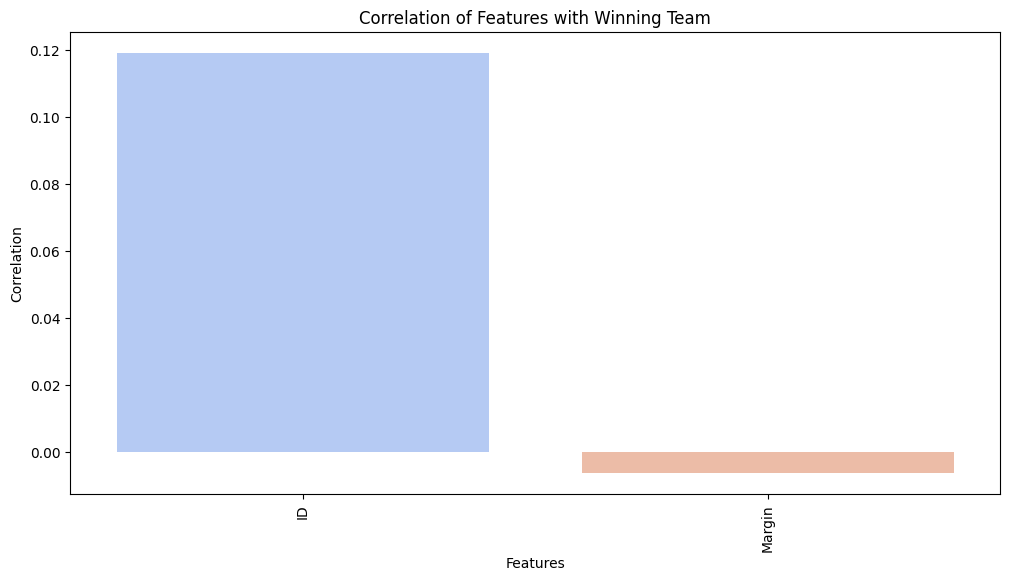

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numeric columns
numeric_columns = df.select_dtypes(include='number')

# Compute the correlation matrix
correlation_matrix = numeric_columns.corr()

# Select the correlation of "WinningTeam" with other features
correlation_with_winning_team = correlation_matrix["WinningTeam"].sort_values(ascending=False)

# Drop the "WinningTeam" itself
correlation_with_winning_team = correlation_with_winning_team.drop("WinningTeam")

# Create a bar chart of the correlations
plt.figure(figsize=(12, 6))
sns.barplot(x=correlation_with_winning_team.index, y=correlation_with_winning_team.values, palette="coolwarm")
plt.title("Correlation of Features with Winning Team")
plt.xticks(rotation=90)
plt.xlabel("Features")
plt.ylabel("Correlation")
plt.show()


In [10]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {'C': [0.1, 1, 10, 100], 'kernel': ['linear', 'rbf', 'poly'], 'gamma': ['scale', 'auto']}

# Create a SVM classifier
svm = SVC(random_state=0)

# Instantiate the GridSearchCV object
grid_search = GridSearchCV(estimator=svm, param_grid=param_grid, scoring='accuracy', cv=5)
grid_search.fit(X_train, y_train)

# Get the best parameters and best estimator
best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

# Use the best estimator for prediction
y_pred_svm_tuned = best_estimator.predict(X_test)

# Evaluate the tuned model
performance(best_estimator, X_train, y_train, y_pred_svm_tuned, y_test)


c:\Users\NEW\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


Training Score: 0.2764350453172205
Testing Score: 0.13028169014084506
Classification Report:
              precision    recall  f1-score   support

           0       0.13      0.40      0.20        30
           1       0.00      0.00      0.00         8
           2       0.25      0.07      0.11        14
           3       0.50      0.04      0.07        26
           4       0.50      0.40      0.44         5
           5       0.18      1.00      0.30         3
           6       0.00      0.00      0.00        27
           7       0.00      0.00      0.00         1
           8       0.09      0.09      0.09        35
           9       0.00      0.00      0.00         3
          10       0.17      0.12      0.14        42
          11       0.00      0.00      0.00         4
          12       0.00      0.00      0.00         2
          13       0.23      0.09      0.13        33
          14       0.00      0.00      0.00         6
          15       0.00      0.00      0.0

c:\Users\NEW\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\NEW\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\NEW\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg

In [24]:
import pandas as pd

# Assuming df is your DataFrame
# Replace 'your_data.csv' with the actual path to your CSV file
df = pd.read_csv('IPL_Matches_2008_2022.csv')

# Set the threshold for non-null values
threshold = 950

# Drop columns with non-null values less than the threshold
df_dropped = df.dropna(thresh=threshold, axis=1)

# Display the resulting DataFrame
df_dropped


,ID,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,WonBy,Team1Players,Team2Players,Umpire1,Umpire2
0,1312200,2022-05-29,2022,Final,Rajasthan Royals,Gujarat Titans,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,bat,Wickets,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",CB Gaffaney,Nitin Menon
1,1312199,2022-05-27,2022,Qualifier 2,Royal Challengers Bangalore,Rajasthan Royals,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,field,Wickets,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...",CB Gaffaney,Nitin Menon
2,1312198,2022-05-25,2022,Eliminator,Royal Challengers Bangalore,Lucknow Super Giants,"Eden Gardens, Kolkata",Lucknow Super Giants,field,Runs,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['Q de Kock', 'KL Rahul', 'M Vohra', 'DJ Hooda...",J Madanagopal,MA Gough
3,1312197,2022-05-24,2022,Qualifier 1,Rajasthan Royals,Gujarat Titans,"Eden Gardens, Kolkata",Gujarat Titans,field,Wickets,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",BNJ Oxenford,VK Sharma
4,1304116,2022-05-22,2022,70,Sunrisers Hyderabad,Punjab Kings,"Wankhede Stadium, Mumbai",Sunrisers Hyderabad,bat,Wickets,"['PK Garg', 'Abhishek Sharma', 'RA Tripathi', ...","['JM Bairstow', 'S Dhawan', 'M Shahrukh Khan',...",AK Chaudhary,NA Patwardhan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
945,335986,2008-04-20,2007/08,4,Kolkata Knight Riders,Deccan Chargers,Eden Gardens,Deccan Chargers,bat,Wickets,"['WP Saha', 'BB McCullum', 'RT Ponting', 'SC G...","['AC Gilchrist', 'Y Venugopal Rao', 'VVS Laxma...",BF Bowden,K Hariharan
946,335985,2008-04-20,2007/08,5,Mumbai Indians,Royal Challengers Bangalore,Wankhede Stadium,Mumbai Indians,bat,Wickets,"['L Ronchi', 'ST Jayasuriya', 'DJ Thornely', '...","['S Chanderpaul', 'R Dravid', 'LRPL Taylor', '...",SJ Davis,DJ Harper
947,335984,2008-04-19,2007/08,3,Delhi Daredevils,Rajasthan Royals,Feroz Shah Kotla,Rajasthan Royals,bat,Wickets,"['G Gambhir', 'V Sehwag', 'S Dhawan', 'MK Tiwa...","['T Kohli', 'YK Pathan', 'SR Watson', 'M Kaif'...",Aleem Dar,GA Pratapkumar
948,335983,2008-04-19,2007/08,2,Kings XI Punjab,Chennai Super Kings,"Punjab Cricket Association Stadium, Mohali",Chennai Super Kings,bat,Runs,"['K Goel', 'JR Hopes', 'KC Sangakkara', 'Yuvra...","['PA Patel', 'ML Hayden', 'MEK Hussey', 'MS Dh...",MR Benson,SL Shastri


In [27]:
df_dropped

,ID,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,WonBy,Team1Players,Team2Players,Umpire1,Umpire2
0,1312200,2022-05-29,2022,Final,Rajasthan Royals,Gujarat Titans,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,bat,Wickets,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",CB Gaffaney,Nitin Menon
1,1312199,2022-05-27,2022,Qualifier 2,Royal Challengers Bangalore,Rajasthan Royals,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,field,Wickets,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...",CB Gaffaney,Nitin Menon
2,1312198,2022-05-25,2022,Eliminator,Royal Challengers Bangalore,Lucknow Super Giants,"Eden Gardens, Kolkata",Lucknow Super Giants,field,Runs,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['Q de Kock', 'KL Rahul', 'M Vohra', 'DJ Hooda...",J Madanagopal,MA Gough
3,1312197,2022-05-24,2022,Qualifier 1,Rajasthan Royals,Gujarat Titans,"Eden Gardens, Kolkata",Gujarat Titans,field,Wickets,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",BNJ Oxenford,VK Sharma
4,1304116,2022-05-22,2022,70,Sunrisers Hyderabad,Punjab Kings,"Wankhede Stadium, Mumbai",Sunrisers Hyderabad,bat,Wickets,"['PK Garg', 'Abhishek Sharma', 'RA Tripathi', ...","['JM Bairstow', 'S Dhawan', 'M Shahrukh Khan',...",AK Chaudhary,NA Patwardhan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
945,335986,2008-04-20,2007/08,4,Kolkata Knight Riders,Deccan Chargers,Eden Gardens,Deccan Chargers,bat,Wickets,"['WP Saha', 'BB McCullum', 'RT Ponting', 'SC G...","['AC Gilchrist', 'Y Venugopal Rao', 'VVS Laxma...",BF Bowden,K Hariharan
946,335985,2008-04-20,2007/08,5,Mumbai Indians,Royal Challengers Bangalore,Wankhede Stadium,Mumbai Indians,bat,Wickets,"['L Ronchi', 'ST Jayasuriya', 'DJ Thornely', '...","['S Chanderpaul', 'R Dravid', 'LRPL Taylor', '...",SJ Davis,DJ Harper
947,335984,2008-04-19,2007/08,3,Delhi Daredevils,Rajasthan Royals,Feroz Shah Kotla,Rajasthan Royals,bat,Wickets,"['G Gambhir', 'V Sehwag', 'S Dhawan', 'MK Tiwa...","['T Kohli', 'YK Pathan', 'SR Watson', 'M Kaif'...",Aleem Dar,GA Pratapkumar
948,335983,2008-04-19,2007/08,2,Kings XI Punjab,Chennai Super Kings,"Punjab Cricket Association Stadium, Mohali",Chennai Super Kings,bat,Runs,"['K Goel', 'JR Hopes', 'KC Sangakkara', 'Yuvra...","['PA Patel', 'ML Hayden', 'MEK Hussey', 'MS Dh...",MR Benson,SL Shastri


In [29]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

# Load the dataset
csv_file_path = 'IPL_Matches_2008_2022.csv'
df = pd.read_csv(csv_file_path)

# Choose the target variable
target_variable = 'WonBy'

# Drop features with non-values less than 950
df_cleaned = df.dropna(thresh=950, axis=1)

# Select relevant features
selected_features = ['ID', 'Date', 'Season', 'MatchNumber', 'Team1', 'Team2', 'Venue', 'TossWinner', 'TossDecision', 'WonBy', 'Team1Players', 'Team2Players', 'Umpire1', 'Umpire2']
df_selected = df_cleaned[selected_features]

# Encode categorical variables
label_encoder = LabelEncoder()
df_encoded = df_selected.apply(lambda col: label_encoder.fit_transform(col.astype(str)), axis=0)

# Impute missing values
imputer = SimpleImputer(strategy='mean')
df_imputed = pd.DataFrame(imputer.fit_transform(df_encoded), columns=df_encoded.columns)

# Split the data into training and testing sets
X = df_imputed.drop(target_variable, axis=1)
y = df_imputed[target_variable].ravel()  # Convert to 1D array
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the SVM model
regressor_svm = SVR()
regressor_svm.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred_svm = regressor_svm.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred_svm)
print(f'Mean Squared Error: {mse}')

# Add any additional evaluation metrics or analysis as needed


Mean Squared Error: 1.22831401506384


In [30]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler

# Load the dataset
csv_file_path = 'IPL_Matches_2008_2022.csv'
df = pd.read_csv(csv_file_path)

# Choose the target variable
target_variable = 'WonBy'

# Drop features with non-values less than 950
df_cleaned = df.dropna(thresh=950, axis=1)

# Select relevant features
selected_features = ['ID', 'Date', 'Season', 'MatchNumber', 'Team1', 'Team2', 'Venue', 'TossWinner', 'TossDecision', 'WonBy', 'Team1Players', 'Team2Players', 'Umpire1', 'Umpire2']
df_selected = df_cleaned[selected_features]

# Encode categorical variables
label_encoder = LabelEncoder()
df_encoded = df_selected.apply(lambda col: label_encoder.fit_transform(col.astype(str)), axis=0)

# Impute missing values
imputer = SimpleImputer(strategy='mean')
df_imputed = pd.DataFrame(imputer.fit_transform(df_encoded), columns=df_encoded.columns)

# Split the data into training and testing sets
X = df_imputed.drop(target_variable, axis=1)
y = df_imputed[target_variable].ravel()  # Convert to 1D array
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the SVM model
regressor_svm = SVR()
regressor_svm.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred_svm = regressor_svm.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred_svm)
r2 = r2_score(y_test, y_pred_svm)
mae = mean_absolute_error(y_test, y_pred_svm)

print(f'Mean Squared Error: {mse}')
print(f'R-squared (R²): {r2}')
print(f'Mean Absolute Error (MAE): {mae}')

# Add any additional evaluation metrics or analysis as needed


Mean Squared Error: 1.22831401506384
R-squared (R²): -0.25668516207466774
Mean Absolute Error (MAE): 0.9619874764375057


In [31]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler

# Load the dataset
csv_file_path = 'IPL_Matches_2008_2022.csv'
df = pd.read_csv(csv_file_path)

# Choose the target variable
target_variable = 'WonBy'

# Drop features with non-values less than 950
df_cleaned = df.dropna(thresh=950, axis=1)

# Select relevant features
selected_features = ['ID', 'Date', 'Season', 'MatchNumber', 'Team1', 'Team2', 'Venue', 'TossWinner', 'TossDecision', 'WonBy', 'Team1Players', 'Team2Players', 'Umpire1', 'Umpire2']
df_selected = df_cleaned[selected_features]

# Encode categorical variables
label_encoder = LabelEncoder()
df_encoded = df_selected.apply(lambda col: label_encoder.fit_transform(col.astype(str)), axis=0)

# Impute missing values
imputer = SimpleImputer(strategy='mean')
df_imputed = pd.DataFrame(imputer.fit_transform(df_encoded), columns=df_encoded.columns)

# Split the data into training and testing sets
X = df_imputed.drop(target_variable, axis=1)
y = df_imputed[target_variable].ravel()  # Convert to 1D array
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the SVM model
regressor_svm = SVR()
regressor_svm.fit(X_train_scaled, y_train)

# Make predictions on the train set
y_train_pred_svm = regressor_svm.predict(X_train_scaled)

# Make predictions on the test set
y_test_pred_svm = regressor_svm.predict(X_test_scaled)

# Evaluate the model on the train set
train_r2 = r2_score(y_train, y_train_pred_svm)
train_mse = mean_squared_error(y_train, y_train_pred_svm)
train_mae = mean_absolute_error(y_train, y_train_pred_svm)

# Evaluate the model on the test set
test_r2 = r2_score(y_test, y_test_pred_svm)
test_mse = mean_squared_error(y_test, y_test_pred_svm)
test_mae = mean_absolute_error(y_test, y_test_pred_svm)

print(f'Train R-squared (R²): {train_r2}')
print(f'Train Mean Squared Error (MSE): {train_mse}')
print(f'Train Mean Absolute Error (MAE): {train_mae}')

print(f'Test R-squared (R²): {test_r2}')
print(f'Test Mean Squared Error (MSE): {test_mse}')
print(f'Test Mean Absolute Error (MAE): {test_mae}')


Train R-squared (R²): 0.2260152928169724
Train Mean Squared Error (MSE): 0.7692022428133318
Train Mean Absolute Error (MAE): 0.6997644748910762
Test R-squared (R²): -0.25668516207466774
Test Mean Squared Error (MSE): 1.22831401506384
Test Mean Absolute Error (MAE): 0.9619874764375057


In [34]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler

# Function to calculate accuracy within a threshold
def calculate_accuracy(y_true, y_pred, threshold):
    correct_predictions = sum(abs(y_true - y_pred) <= threshold)
    total_predictions = len(y_true)
    accuracy = correct_predictions / total_predictions
    return accuracy

# Load the dataset
csv_file_path = 'IPL_Matches_2008_2022.csv'
df = pd.read_csv(csv_file_path)

# Choose the target variable
target_variable = 'WonBy'

# Drop features with non-values less than 950
df_cleaned = df.dropna(thresh=950, axis=1)

# Select relevant features
selected_features = ['ID', 'Date', 'Season', 'MatchNumber', 'Team1', 'Team2', 'Venue', 'TossWinner', 'TossDecision', 'WonBy', 'Team1Players', 'Team2Players', 'Umpire1', 'Umpire2']
df_selected = df_cleaned[selected_features]

# Encode categorical variables
label_encoder = LabelEncoder()
df_encoded = df_selected.apply(lambda col: label_encoder.fit_transform(col.astype(str)), axis=0)

# Impute missing values
imputer = SimpleImputer(strategy='mean')
df_imputed = pd.DataFrame(imputer.fit_transform(df_encoded), columns=df_encoded.columns)

# Split the data into training and testing sets
X = df_imputed.drop(target_variable, axis=1)
y = df_imputed[target_variable].ravel()  # Convert to 1D array
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the SVM model
regressor_svm = SVR()
regressor_svm.fit(X_train_scaled, y_train)

# Make predictions on the training set
y_train_pred = regressor_svm.predict(X_train_scaled)
train_accuracy = calculate_accuracy(y_train, y_train_pred, threshold=20)

# Make predictions on the test set
y_test_pred = regressor_svm.predict(X_test_scaled)
test_accuracy = calculate_accuracy(y_test, y_test_pred, threshold=20)

# Evaluate the model
mse = mean_squared_error(y_test, y_test_pred)
r2 = r2_score(y_test, y_test_pred)
mae = mean_absolute_error(y_test, y_test_pred)

print(f'Training Accuracy: {train_accuracy * 100:.2f}%')
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')
print(f'Mean Squared Error: {mse}')
print(f'R-squared (R²): {r2}')
print(f'Mean Absolute Error (MAE): {mae}')




Training Accuracy: 100.00%
Test Accuracy: 100.00%
Mean Squared Error: 1.22831401506384
R-squared (R²): -0.25668516207466774
Mean Absolute Error (MAE): 0.9619874764375057


Mean Squared Error: 1.22831401506384
R-squared (R²): -0.25668516207466774
Mean Absolute Error (MAE): 0.9619874764375057
Mean Absolute Percentage Error (MAPE): inf%


C:\Users\NEW\AppData\Local\Temp\ipykernel_6620\2510892579.py:11: RuntimeWarning: divide by zero encountered in divide
  return (1/len(y_true)) * sum(abs((y_true - y_pred) / y_true)) * 100


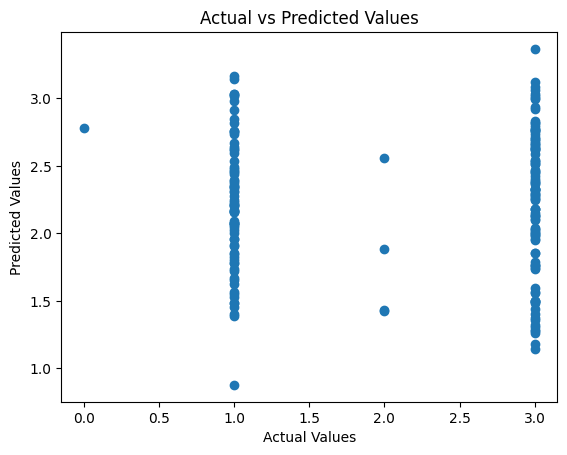

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler

# Function to calculate Mean Absolute Percentage Error (MAPE)
def calculate_mape(y_true, y_pred):
    return (1/len(y_true)) * sum(abs((y_true - y_pred) / y_true)) * 100

# Load the dataset
csv_file_path = 'IPL_Matches_2008_2022.csv'
df = pd.read_csv(csv_file_path)

# Choose the target variable
target_variable = 'WonBy'

# Drop features with non-values less than 950
df_cleaned = df.dropna(thresh=950, axis=1)

# Select relevant features
selected_features = ['ID', 'Date', 'Season', 'MatchNumber', 'Team1', 'Team2', 'Venue', 'TossWinner', 'TossDecision', 'WonBy', 'Team1Players', 'Team2Players', 'Umpire1', 'Umpire2']
df_selected = df_cleaned[selected_features]

# Encode categorical variables
label_encoder = LabelEncoder()
df_encoded = df_selected.apply(lambda col: label_encoder.fit_transform(col.astype(str)), axis=0)

# Impute missing values
imputer = SimpleImputer(strategy='mean')
df_imputed = pd.DataFrame(imputer.fit_transform(df_encoded), columns=df_encoded.columns)

# Split the data into training and testing sets
X = df_imputed.drop(target_variable, axis=1)
y = df_imputed[target_variable].ravel()  # Convert to 1D array
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the SVM model
regressor_svm = SVR()
regressor_svm.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_test_pred = regressor_svm.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_test_pred)
r2 = r2_score(y_test, y_test_pred)
mae = mean_absolute_error(y_test, y_test_pred)
mape = calculate_mape(y_test, y_test_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared (R²): {r2}')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Absolute Percentage Error (MAPE): {mape:.2f}%')

# Add any other relevant evaluation metrics or analysis as needed




# Creating a DataFrame for results
results_df = pd.DataFrame({
    'Metric': ['Mean Squared Error', 'R-squared', 'Mean Absolute Error', 'Mean Absolute Percentage Error'],
    'Value': [mse, r2, mae, mape]
})

# Displaying the results table
results_df



import matplotlib.pyplot as plt

# Plotting actual vs predicted values
plt.scatter(y_test, y_test_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()



In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler

def calculate_mape(y_true, y_pred):
    return (1/len(y_true)) * sum(abs((y_true - y_pred) / y_true)) * 100

csv_file_path = 'IPL_Matches_2008_2022.csv'
df = pd.read_csv(csv_file_path)

target_variable = 'WonBy'

df_cleaned = df.dropna(thresh=950, axis=1)

selected_features = ['ID', 'Date', 'Season', 'MatchNumber', 'Team1', 'Team2', 'Venue', 'TossWinner', 'TossDecision', 'WonBy', 'Team1Players', 'Team2Players', 'Umpire1', 'Umpire2']
df_selected = df_cleaned[selected_features]

label_encoder = LabelEncoder()
df_encoded = df_selected.apply(lambda col: label_encoder.fit_transform(col.astype(str)), axis=0)

imputer = SimpleImputer(strategy='mean')
df_imputed = pd.DataFrame(imputer.fit_transform(df_encoded), columns=df_encoded.columns)

X = df_imputed.drop(target_variable, axis=1)
y = df_imputed[target_variable].ravel()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

regressor_svm = SVR()
regressor_svm.fit(X_train_scaled, y_train)

y_test_pred = regressor_svm.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_test_pred)
r2 = r2_score(y_test, y_test_pred)
mae = mean_absolute_error(y_test, y_test_pred)
mape = calculate_mape(y_test, y_test_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared (R²): {r2}')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Absolute Percentage Error (MAPE): {mape:.2f}%')

results_df = pd.DataFrame({
    'Metric': ['Mean Squared Error', 'R-squared', 'Mean Absolute Error', 'Mean Absolute Percentage Error'],
    'Value': [mse, r2, mae, mape]
})

results_df

import matplotlib.pyplot as plt

plt.scatter(y_test, y_test_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()


Mean Squared Error: 1.22831401506384
R-squared (R²): -0.25668516207466774
Mean Absolute Error (MAE): 0.9619874764375057
Mean Absolute Percentage Error (MAPE): inf%


C:\Users\NEW\AppData\Local\Temp\ipykernel_6620\2296322930.py:10: RuntimeWarning: divide by zero encountered in divide
  return (1/len(y_true)) * sum(abs((y_true - y_pred) / y_true)) * 100


,Metric,Value
0,Mean Squared Error,1.228314
1,R-squared,-0.256685
2,Mean Absolute Error,0.961987
3,Mean Absolute Percentage Error,inf


In [2]:
import matplotlib.pyplot as plt

# Plotting actual vs predicted values
plt.scatter(y_test, y_test_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()


NameError: name 'y_test' is not defined